In [37]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

import matplotlib as mpl
import matplotlib.pyplot as plt

%pip install pydataset
from pydataset import data

Note: you may need to restart the kernel to use updated packages.


In [43]:
df = data('sunspot.year')[df['time'] <= 1800]
df.head()


/tmp/ipykernel_308/4144309237.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = data('sunspot.year')[df['time'] <= 1800]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

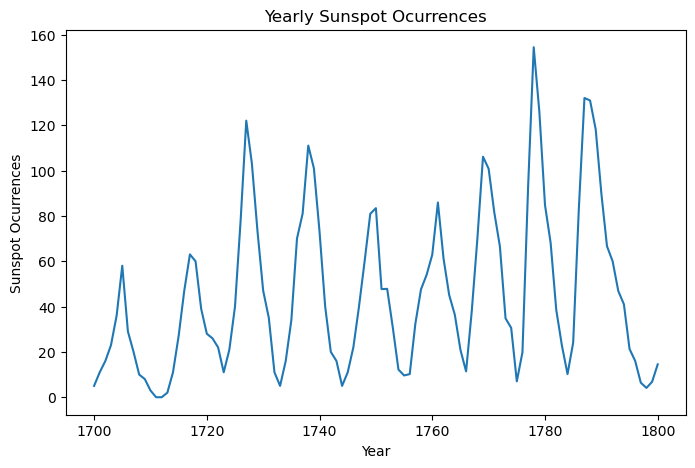

In [26]:
plt.figure(figsize=(8,5))

plt.plot(df['time'], df['sunspot.year'])

plt.xlabel('Year')
plt.ylabel('Sunspot Ocurrences')
plt.title('Yearly Sunspot Ocurrences')
plt.savefig('sunspot_plot.png')

In [27]:
print(f"ADF Statistic: {adfuller(df['sunspot.year'])[0]}, ADF p-value: {adfuller(df['sunspot.year'])[1]}")

ADF Statistic: -6.816175645042357, ADF p-value: 2.056481561970274e-09


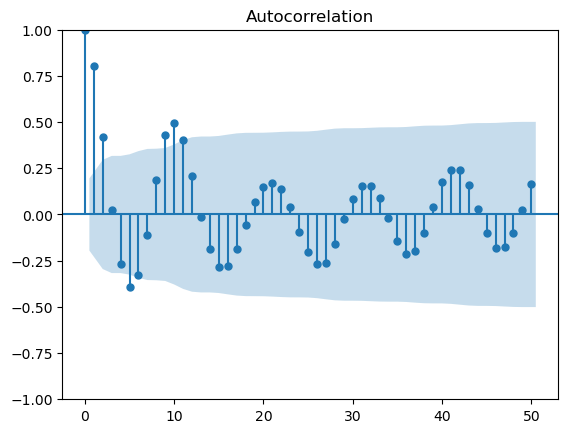

In [35]:
sm.graphics.tsa.plot_acf(df['sunspot.year'], lags=50)
plt.savefig('acf_sunspot.png')

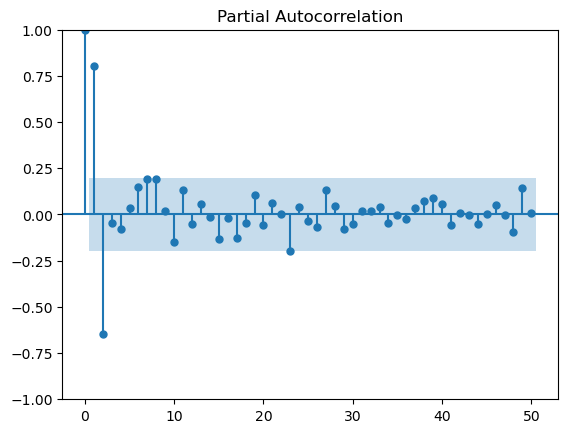

In [34]:
sm.graphics.tsa.plot_pacf(df['sunspot.year'], lags=50)
plt.savefig('pacf_sunspot.png')

In [45]:
from statsmodels.tsa.ar_model import AutoReg
import scipy.stats as stats

model = AutoReg(df['sunspot.year'], lags=2)
results = model.fit()

residuals = results.resid

print(stats.kurtosis(residuals))

1.275451125028427


/home/dimikovic/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


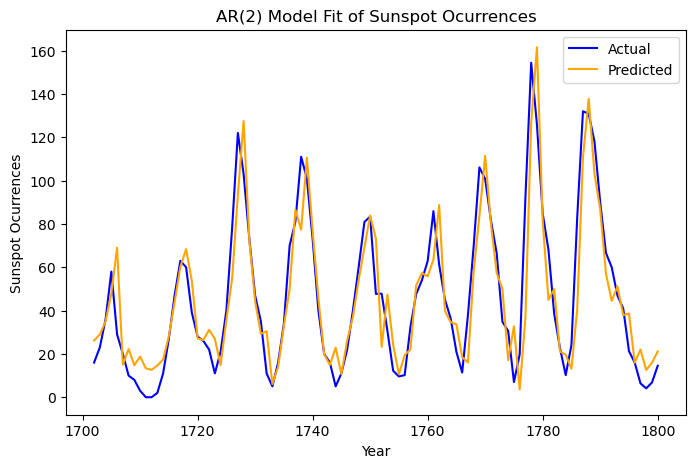

In [53]:
fitted_values = results.fittedvalues

plt.figure(figsize=(8, 5))

plt.plot(df['time'][2:], df['sunspot.year'][2:], label='Actual', color='blue')
plt.plot(df['time'][2:],fitted_values, label='Predicted', color='orange')

plt.title('AR(2) Model Fit of Sunspot Ocurrences')
plt.xlabel('Year')
plt.ylabel('Sunspot Ocurrences')
plt.legend()

plt.savefig('sunspot_ar2.png')